In [2]:
import sys
sys.path.append(r'C:\Users\Mechano_2\PycharmProjects\pro')
sys.path

['C:\\Users\\Mechano_2\\PycharmProjects',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\python37.zip',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\DLLs',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final',
 '',
 'C:\\Users\\Mechano_2\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages',
 'c:\\users\\mechano_2\\fairseq',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Mechano_2\\.ipython',
 'C:\\Users\\Mechano_2\\PycharmProjects\\pro']

In [2]:
import os
import cv2
from scipy import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mecha.fracture as fracture
import mecha.DIC as dic
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches
import pickle
from tqdm import tqdm

Run complete


In [6]:
#csv파일 형식 바꾸기!

"""setting values"""
path = r'E:\experiment data\aluminum\2021-07-27_tension\64tension_1_ver01'

In [ ]:
slice_x1 = 147
slice_x2 = 146
slice_y1 = 334
slice_y2 = 665
file_list = os.listdir(path+'/img')

result = []
for file in tqdm(file_list):
    if file.endswith(".jpg"):
        im = cv2.imread(os.path.join(path,'img', file), cv2.IMREAD_GRAYSCALE)
        im_calculate = np.array(im)
        img_box = im_calculate[slice_y1:slice_y2, slice_x1:slice_x2]

        ave = np.average(img_box)
        result = np.append(result, [ave])

result= result - result[0]
print('Finish')
with open(path+'/ml.pkl','wb') as f:
    pickle.dump(result, f)


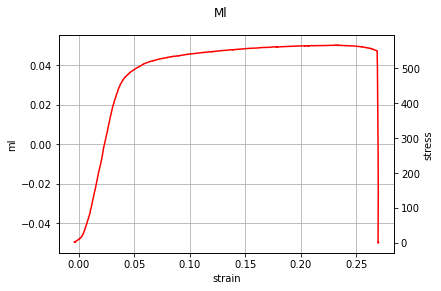

In [7]:
result = pd.read_pickle(path+'/ml.pkl')


ml_avg = np.copy(result)


from scipy.signal import savgol_filter
min_range = 0
max_range = 18000
tension_data = np.array(pd.read_csv(path+'/tension.csv', encoding='CP949'))

time, strain, stress = tension_data[:, 0], tension_data[:, 4]*10/25, tension_data[:, 3]*3000/18
# ml_avg[3545:] = ml_avg[3545:] + 1.4
stress = savgol_filter(stress[min_range:max_range],201,1)
strain = savgol_filter(strain[min_range:max_range],201,1)
# ml_avg = savgol_filter(ml_avg[min_range:max_range],501,1)
ml_avg =  ml_avg[min_range:max_range]
time = time[min_range:max_range]

# vline = [600,1800, 3000,3400,7500,8700,9900,11000,12200,13400,15200,16400]
title = 'ml'
fig, ax = plt.subplots()
ax1 = ax.twinx()
# ax1.vlines(vline, 0,600)
fig.suptitle('Ml')
ax.set_xlabel('strain')
ax.set_ylabel('ml')
ax1.set_ylabel('stress')
ax.plot(strain, ml_avg, color='b', label="Average Ml(Same mask)")
ax1.plot(strain, stress, color='r', label=" stress")
ax.grid()
plt.savefig(path+'/%s.png'%title, dpi=300, bbox_inches='tight',  pad_inches=0)

done


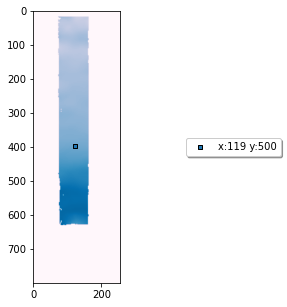

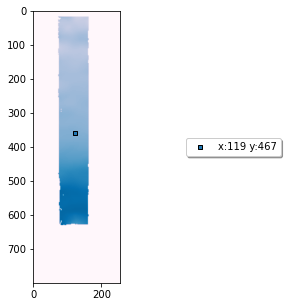

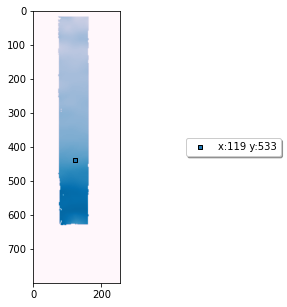

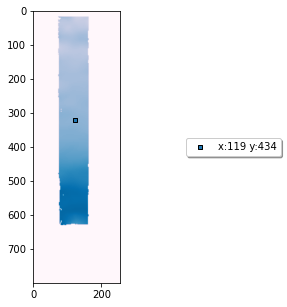

1525


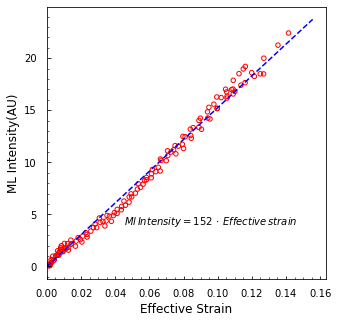

In [17]:
"""
Matlab코드 여러 Dic데이터있는경우
path = 'E:\experiment data\aluminum\2021-07-27_tension\64tension_1_ver01\DIC_img\data'

for i=1:1:35
uu=handles_ncorr.data_dic.displacements(i).plot_u_cur_formatted;
vv=handles_ncorr.data_dic.displacements(i).plot_v_cur_formatted;
exx=handles_ncorr.data_dic.strains(i).plot_exx_cur_formatted;
eyy=handles_ncorr.data_dic.strains(i).plot_eyy_cur_formatted;
exy=handles_ncorr.data_dic.strains(i).plot_exy_cur_formatted;

save([path,'/', num2str(i), '_exx', '.mat'],'exx')
save([path,'/', num2str(i), '_exy', '.mat'],'exy')
save([path,'/', num2str(i), '_eyy', '.mat'],'eyy')
save([path,'/', num2str(i), '_uu', '.mat'],'uu')
save([path,'/', num2str(i), '_vv', '.mat'],'vv')

end

"""

"""setting values"""


image = dic.load_file(path+'/DIC_img')

ref = image[list(image.keys())[0]]
print('done')

ref_xy_list = []
# x_list=np.arange(119,125,30)
# y_list=np.arange(550,610,10)
# for xx in x_list:
#     for yy in y_list:
#         ref_xy_list.append([xx,yy])
ref_xy_list = [[119,500],[119,467],[119,533],[119,434]]

ratio = 1
scale_factor=2

df = pd.DataFrame(columns=['image_name', 'voltage_strain','using_DIC_mask_strain','voltage_stress',
                           'using_DIC_mask_average', 'local_ml', 'local_ee','DIC_exx', 'DIC_eyy', 'DIC_exy','ml_average'])



for ref_x, ref_y in ref_xy_list:
    # for num in [12,,8,9,10,13,14,15,16,17,18,19,20,21,22]:
    for num in range(1,35+1):
        file_num = str(num)
        uu = io.loadmat(path+'/DIC_img/data/'+file_num+'_uu.mat')['uu']
        vv = io.loadmat(path+'/DIC_img/data/'+file_num+'_vv.mat')['vv']
        uu_resize = cv2.resize(uu,(0,0),fx=scale_factor, fy=scale_factor )
        vv_resize = cv2.resize(vv,(0,0),fx=scale_factor, fy=scale_factor )
        exx = io.loadmat(path+'/DIC_img/data/'+file_num+'_exx.mat')['exx']
        eyy = io.loadmat(path+'/DIC_img/data/'+file_num+'_eyy.mat')['eyy']
        exy = io.loadmat(path+'/DIC_img/data/'+file_num+'_exy.mat')['exy']
        ee = fracture.effective_strain(exx, eyy, exy)
        exx_resize = cv2.resize(exx,(0,0),fx=scale_factor, fy=scale_factor )
        eyy_resize = cv2.resize(eyy,(0,0),fx=scale_factor, fy=scale_factor )
        exy_resize = cv2.resize(exy,(0,0),fx=scale_factor, fy=scale_factor )
        ee_resize = cv2.resize(ee,(0,0),fx=scale_factor, fy=scale_factor )

        ee_mask = np.where(ee_resize>0, 255, ee_resize*0).astype('uint8')
        ml_image = image[list(image.keys())[num]][:,:,0].astype('float')

        ml_image_gas = cv2.GaussianBlur(ml_image,(0,0),10)
        mask_ml = dic.find_zone(cv2.copyTo(ml_image_gas, ee_mask))

        if num==1:
            zero_ee_mask = ee_mask
        ref_image = image[list(image.keys())[0]][:,:,0].astype('float')
        ref_image_gas = cv2.GaussianBlur(ref_image,(0,0),10)
        ref_image_mask = dic.find_zone(cv2.copyTo(ref_image_gas, zero_ee_mask))
        cur_y = np.round(ref_y+vv_resize[ref_y,ref_x]/ratio,1).astype('int')
        cur_x = np.round(ref_x+uu_resize[ref_y,ref_x]/ratio,1).astype('int')
        local_ee = np.average(ee_resize[cur_y-17 : cur_y+17 , cur_x-17: cur_x+17])

        dst = cv2.subtract(ml_image[cur_y-17 : cur_y+17 , cur_x-17: cur_x+17],ref_image[ref_y-17 : ref_y+17 , ref_x-17 : ref_x+17])
        local_ml = np.average(cv2.GaussianBlur(dst,(0,0),10))

        image_name = int(list(image.keys())[num].split('_')[1])
        voltage_strain = strain[int(list(image.keys())[num].split('_')[1])]
        voltage_stress = stress[int(list(image.keys())[num].split('_')[1])]
        using_DIC_mask_strain = np.average(dic.find_zone(ee_resize))
        using_DIC_mask_average = np.average(mask_ml)-np.average(ref_image_mask)

        DIC_eyy = np.average(dic.find_zone(eyy))
        DIC_exx = np.average(dic.find_zone(exx))
        DIC_exy = np.average(dic.find_zone(exy))
        ml_average = ml_avg[int(list(image.keys())[num].split('_')[1])]
        row = pd.Series([image_name, voltage_strain,voltage_stress,using_DIC_mask_strain,
                         using_DIC_mask_average, local_ml, local_ee,DIC_exx, DIC_eyy, DIC_exy,ml_average],
                    index=['image_name', 'voltage_strain','voltage_stress','using_DIC_mask_strain',
                           'using_DIC_mask_average', 'local_ml', 'local_ee','DIC_exx', 'DIC_eyy', 'DIC_exy','ml_average'])
        df = df.append(row, ignore_index=True)
        #
        # fig, ax = plt.subplots(1, 3 , constrained_layout=True)
        # fig.suptitle(list(image.keys())[num] + 'strain : ' + str(np.round(strain[int(list(image.keys())[num].split('_')[1])],3)))
        #
        # ax0 = ax[0].imshow(cv2.addWeighted(ml_image,1, ee_mask.astype('float'),0.06,-10),cmap='gray')
        #
        # # ax0 = ax[0].imshow(cv2.addWeighted(ml_image[:,:,2],1, ee_mask,0.06,-10),cmap='gray')
        # ax[0].set_title('ML ROI')
        # # ax[0].scatter(cur_x, cur_y,color='red', marker='s', s=3)
        #
        # ax1 = ax[1].imshow(ee_resize, cmap='jet', vmin=0, vmax=0.25)
        # ax[1].set_title('Effective\n strain')
        # # ax[1].scatter(cur_x, cur_y,color='white', marker='s', s=10)
        # plt.colorbar(ax1,ax=ax[1])
        #
        # gas = cv2.flip(gas,0)
        # ax[2].imshow(gas)
        # ax2 = ax[2].contourf(gas,cmap='jet', vmin=100, vmax=120)
        # ax3 = ax[2].contour(gas,colors='black',linewidths=1)
        # ax[2].invert_yaxis()
        # plt.colorbar(ax2, ax=ax[2])
        # # ax[2].axis('off')
        # ax[2].set_title('ML')
        # # plt.savefig(path+'/'+list(image.keys())[num]+'.png', dpi=300)
        # plt.show()
        # plt.close()

    plt.imshow(ee_resize, cmap='PuBu', vmin=0, vmax=0.25) ##네킹부분 국부
    plt.scatter(cur_x, cur_y, marker='s', s=10  ,label='x:'+str(ref_x) + ' y:'+str(ref_y), edgecolors='black')
    plt.legend()
    plt.legend(loc='center right', bbox_to_anchor=(2.9, 0.5), fancybox=True, shadow=True)
    # plt.savefig(path+'/국부 점으로찍은위치6.png', dpi=300)
    plt.show()
    plt.close()


"""최소자승법"""
lms_list = []
for k in range(0,5000):
    i = k*0.1
    lms = np.sum(((i * df.local_ee) - df.local_ml)**2)
    lms_list.append(lms)
np.argmin(lms_list)

plt.rcParams["figure.figsize"] = (5,5)

plt.text(0.045,4.0,'$Ml\,Intensity=%s \,\cdot\, Effective\,strain$'%str(round(np.argmin(lms_list)/10)), fontsize='10')
plt.scatter(df.local_ee, df.local_ml, color='red',zorder=1, s=20, marker='o', facecolors='none')
plt.plot([0,np.max(df.local_ee)*1.1],[0,1.1*np.max(df.local_ee)*0.1*np.argmin(lms_list)], 'b--',zorder=2)
# plt.scatter(df.using_DIC_mask_strain, df.ml_average, color='black')
plt.xlabel('Effective Strain')
plt.ylabel('ML Intensity(AU)')
# plt.grid()
# plt.xlim(0,0.15)
plt.tick_params(direction='in', pad=10,which='both')
plt.minorticks_on()
plt.xlim(0,)
# plt.ylim(0,)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.savefig(path+'/ee_ml.png', dpi=300, bbox_inches='tight',  pad_inches=0)

print(np.argmin(lms_list))

